# <img src="uni-logo.png" alt="Logo UNI" width=150 hight=300 align="right">


<br><br><br>
<h1><font color="#7F000E" size=4>Minería de Datos (CC442)</font></h1>



<h1><font color="#7F000E" size=6>Regresión lineal II</font></h1>

<br>
<div style="text-align: right">
<font color="#7F000E" size=3>Yuri Coicca, M.Sc.</font><br>
<font color="#7F000E" size=3>Facultad de Ciencias</font><br>
<font color="#7F000E" size=3>Ciencia de la Computación - UNI</font><br>
</div>

## <font color="#7F000E"> Regresión lineal multivariante </font>



<br>
Como vimos en el ejercicio anterior, la regresión lineal multivariada expresa la variable de salida como combinación lineal de las variables de entrada:


$$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots \theta_k x_k
$$


El error asociado a un modelo $\theta = ( \theta_0,  \theta_1 , \ldots,  \theta_k)$ con respecto a un conjunto de datos se expresa como:

$$
error(\theta) = \frac{1}{N}\sum_{i=0}^N \left(y^{(i)} - (\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \cdots \theta_k x_k^{(i)})\right)^2    
$$

En el contexto de aprendizaje automático, se utiliza una función similar, denominada de *__coste__* o *__pérdida__*, que se formula como:

$$
coste(\theta) = \frac{1}{2N}\sum_{i=0}^N \left((\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \cdots \theta_k x_k^{(i)}) - y^{(i)}  \right)^2    
$$

Por otra parte, en el tutorial anterior también se vió que una forma de obtener la combinación óptima de parámetros, la que minimiza la función de coste, es mediante la resolución de la ecuación normal:


$$
\theta = (X^T \cdot X)^{-1} \cdot X^T \cdot Y
$$


<bR>
Ambas funciones se implementan a continuación.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Calcula la función de coste
def get_coste(X, Y, beta):
    return np.sum((X.dot(beta)-Y)**2)/(2*len(Y))

# Obtiene los valores de los coeficientes mediante la ecuación normal
def get_lrmodel_ne(X,Y):
    #return np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
    #return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    return np.linalg.inv(X.T @ X )@ X.T @ Y

Debido a que la obtención de los coeficientes mediante la ecuación normal (la complejidad del cálculo de $(X^T \cdot X)^{-1}$ es ${\cal{O}}(N^3)$), en la práctica se utilizan otros algoritmos como ___gradiente descendiente___ que, debido a su importancia se va a ver en este curso. Para ello, se estudiarán las propiedades de la función de coste, la información que proporciona la derivada de esta función y, finalmente, cómo el algoritmo gradiente descendiente permite encontrar el punto mínimo de la función de coste.

---

<h3><font color="#7F000E" size=4> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio 1</font></h3>

En el ejercicio anterior se trataron de manera independiente la regresión lineal univariada y la múltiple. Sin embargo, la regresión lineal univariada es un caso concreto de la múltiple. El archivo `auto.txt` contiene los datos de peso y consumo para un conjunto de coches. Utilizando las funciones `get_coste()` y `get_lrmodel_ne()`, obtener los coeficientes del modelo, dibujar la recta correspondiente, e imprimir el coste.

El modelo es:  [-0.715713    9.04047744]
El coste del modelo es: 2.267


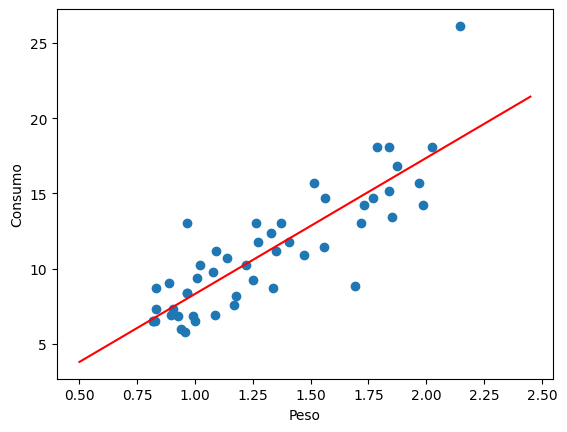

In [3]:
# Lectura de los datos
datos = np.loadtxt('auto.txt')
N,_ = datos.shape 
X = datos[:,0]
Y = datos[:,1]

# Añade el término independiente
X.shape = (N,1)
X = np.hstack((np.ones(X.shape), X))

# Calcula el modelo 
theta = get_lrmodel_ne(X,Y)
print("El modelo es: ", theta)

# Calcula e imprime el coste
coste = get_coste(X,Y,theta)
print("El coste del modelo es: {:.3f}".format(coste))

# Para mostrar el modelo, genera valores relativos al peso
X_modelo = np.arange(0.5, 2.5, 0.05)
X_modelo.shape=(len(X_modelo),1)

# Añade la columna de unos
X_modelo = np.hstack((np.ones(X_modelo.shape), X_modelo))
# Obtiene las salidas correspondientes
Y_modelo = np.dot(X_modelo, theta)

# Dibuja la gráfica 
plt.scatter(X[:,1],Y)
# Dibuja la recta
plt.plot(X_modelo[:,1], Y_modelo, 'r');
plt.xlabel('Peso');
plt.ylabel('Consumo');
plt.show()
#El modelo es:  [-0.715713    9.04047744]
#El coste del modelo es: 2.267

<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#004D7F"></i>
 </font></div>

---


## <font color="#004D7F">La función de coste </font>

Como se vio en la primera parte del tutorial, cada configuración de valores de $\theta$ da lugar a una recta y, por consiguiente, a un valor de coste. En este ejemplo vamos a partir de una configuración (arbitraria) en la que $\theta_0=0$ y $\theta_1=5$, para ver cómo afecta la variación en los parámetros a la función de coste. 

<br>
<h3><font color="#004D7F" size=4> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio 2</font></h3>

Calcular los costes para un conjunto de modelos en los que $\theta_1 = 5$, y $\theta_0$ tome valores en el rango $[-10, 10]$. Elaborar la gráfica ($\theta_0$ / coste) correspondiente. Repetir la operación para $\theta_1$, fijando $\theta_0 = 0$ y considerando valores $\theta_1$ en el rango $[4,14]$. 

¿Qué se puede apreciar en ellas?

In [3]:
# Fijamos theta_1
theta_1 = 5
# Crea los distintos valores para theta_0 y un array para almacenar costes correspondientes
valores_0 = np.arange(-10,10,0.05)

costes_0 = np.zeros(valores_0.shape)

# Obtiene los valores y dibuja la figura
for i, theta_0 in enumerate(valores_0):
    costes_0[i] = get_coste(X,Y, (theta_0, theta_1))

# Fijamos theta_0
theta_0 = 0
# Crea los distintos valores para theta_1 y un array para almacenar los costes correspondientes. 
valores_1 = np.arange(4,14,0.05)

costes_1 = np.zeros(valores_1.shape)
# Obtiene los valores y dibuja la figura
for i, theta_1 in enumerate(valores_1):
    costes_1[i] = get_coste(X,Y, (theta_0, theta_1))
    
# Crea una figura en la que va a incluir 2 gráficas, distribuídas en una rejilla de 1x2
f, axes_grid = plt.subplots(1, 2)
axes_grid[0].plot(valores_0, costes_0, 'r');    
axes_grid[0].set_xlabel(r'$\theta_0$');
axes_grid[0].set_ylabel(r'$Coste(\theta)$');
axes_grid[1].plot(valores_1, costes_1, 'r');
axes_grid[1].set_xlabel(r'$\theta_1$');

print(costes_1[:5])
#[21.443083   21.02322502 20.60801939 20.19746611 19.79156517]

[21.443083   21.02322502 20.60801939 20.19746611 19.79156517]


<div class="alert alert-block alert-info">
<i class="fa fa-info-circle" aria-hidden="true"></i> 
  Se aprecia que las funciones son convexas, es decir, la tangente a la función siempre está por debajo de la misma, y el segmento que une dos puntos, está por encima. Estas funciones no tienen máximos (sí en los extremos del rango) y tienen ___un solo mínimo___. 
</div>

<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#004D7F"></i>
 </font></div>

---

<h3><font color="#004D7F" size=4> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio 3</font></h3>

Cargar el archivo `bodyfat.txt` y considerar el modelo en el que $\theta_j=0 \,\, \forall j$. Obtener una gráfica similar a las anteriores a partir del coeficiente $\theta_3$, considerando para éste el rango $[-2,2]$  (gráfica $\theta_3$ vs coste). ¿Qué se observa?

In [4]:
# Carga los datos
datos = np.loadtxt('bodyfat.txt')
N,k = datos.shape
k=k-1
#print(N," casos, ",k," variables")

# Obtiene las variables de entrada y de salida.
X = datos[:,:-1]
Y = datos[:,-1]

# Añade una columna con todos los valores a 1.
X = np.hstack((np.ones((N,1)), X))

# Calcula el modelo 
theta = np.zeros(15,)

# Crea los distintos valores para theta_3 y un array
# para almacenar costes.
valores_3= np.arange(-2,2,0.05)
coste_3 = np.zeros(valores_3.shape)

# Obtiene los valores y dibuja la figura
for i, theta_3 in enumerate(valores_3):
    theta[3] = theta_3
    coste_3[i] = get_coste(X,Y,theta) 
    
plt.plot(valores_3, coste_3, 'r')
plt.xlabel(r'$\theta_3$');
plt.ylabel(r'$Coste(\theta)$');

print(coste_3[:5])
#[6153.7580754  5898.15320933 5647.98043651 5403.23975694 5163.93117063]

[6153.7580754  5898.15320933 5647.98043651 5403.23975694 5163.93117063]


<div class="alert alert-block alert-info">
<i class="fa fa-info-circle" aria-hidden="true"></i> 
    Igual que anteriormente, la función de coste con respecto al valor de $\theta_3$ es convexa. Puede comprobarse que esto pasa para todos los parámetros, es decir, ___la función de coste es convexa___.
</div>

<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#004D7F"></i>
 </font></div>

---


## <font color="#004D7F"> Gradientes </font>

<h3><font color="#004D7F" size=4> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio 4</font></h3>

El valor de la derivada  de una función (también las derivadas parciales) refleja la pendiente de la recta tangente a la función en ese punto.  Debido a que la función $coste(\theta)$, es convexa, solamente existe un ___único punto en el que la derivada es cero___, que corresponde con el mínimo de la función.

<br>
La derivada parcial de la función de coste respecto a un parámetro, $\theta_j$,  se calcula como:


$$
\frac{\partial}{\partial \theta_j}coste(\theta) = \frac{1}{N} \left[ \sum_{i=0}^N \left((\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \cdots \theta_k x_k^{(i)})- y^{(i)} \right) \cdot x_j^{(i)} \right] 
$$

<br>
Calcular el valor de la derivada parcial $\frac{\partial}{\partial \theta_3}coste(\theta)$ en el modelo en el que $\theta_j=0 \,\, \forall j$.

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle" aria-hidden="true"></i> 
 El valor de la derivada parcial se puede calcular en una sola expresión. En este caso devuelve un valor muy cercano a cero.
</div>
  

In [5]:
# Calcula el modelo óptimo
theta =np.zeros(15,)

j=3
gradiente = np.sum(((X @ theta)-Y) * X[:,j])/N
print("El valor de \u03B8\u2083 es: {:6f}.".format(theta[j]))
print("El valor de la derivada parcial para \u03B8\u2083 en ese punto es: {:.6f}.".format(gradiente))

#El valor de θ₃ es: 0.000000.
#El valor de la derivada parcial para θ₃ en ese punto es: -820.743651.

El valor de θ₃ es: 0.000000.
El valor de la derivada parcial para θ₃ en ese punto es: -820.743651.


<div class="alert alert-block alert-warning">
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
&nbsp;El valor de la derivada parcial de la función de coste respecto a un coeficiente $\theta_j$, consiste en: calcular el error del modelo para cada uno de los ejemplos $i$ en la base de datos; multiplicar el error correspondiente a cada ejemplo $i$ por el valor de la variable $j$ en el ejemplo $i$; y finalmente sumar todos los productos y dividirlos por el número de ejemplos. 


<br><br>
En el caso de $j=0$, como $x_0^{(i)}=1 \, \forall i$, la derivada parcial es la media de los errores.
    
<br><br>

$$
\frac{\partial}{\partial \theta_0}coste(\theta) = \frac{1}{N} \left[ \sum_{i=0}^N \left((\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \cdots \theta_k x_k^{(i)})- y^{(i)} \right) \cdot 1 \right] = \frac{1}{N} \left[ \sum_{i=0}^N (\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \cdots \theta_k x_k^{(i)})- y^{(i)}  \right]
$$    </div>

---
Calcular el valor de la derivada parcial en $\theta_3$ para los valores $\{0, 0.1, 0.2, 0.3, 0.32, 0.34, 0.36, 0.37, 0.38, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1\} $ (el resto de valores de $\theta$ permanecen fijos a cero).
- ¿Qué información nos proporciona el signo de la derivada parcial en un punto con respecto a la posición del valor óptimo $\theta_3$?
- ¿Qué relación tiene el valor absoluto de la derivada en un punto con la distancia de ese punto al mínimo? 

In [6]:
valores_theta = np.array([0, 0.1, 0.2, 0.3, 0.32, 0.34, 0.36, 0.37, 0.38, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
for valor_theta in valores_theta:
    theta[3] = valor_theta
    gradiente = np.sum(((X @ theta)-Y) * X[:,j])/N
    print("El valor de la derivada parcial para \u03B8\u2083 en", valor_theta,  "es: ", gradiente)
    
#El valor de la derivada parcial para θ₃ en 0.0 es:  -820.7436507936509
#El valor de la derivada parcial para θ₃ en 0.1 es:  -603.459920634921
#El valor de la derivada parcial para θ₃ en 0.2 es:  -386.1761904761904

El valor de la derivada parcial para θ₃ en 0.0 es:  -820.7436507936508
El valor de la derivada parcial para θ₃ en 0.1 es:  -603.4599206349208
El valor de la derivada parcial para θ₃ en 0.2 es:  -386.17619047619047
El valor de la derivada parcial para θ₃ en 0.3 es:  -168.89246031746035
El valor de la derivada parcial para θ₃ en 0.32 es:  -125.43571428571427
El valor de la derivada parcial para θ₃ en 0.34 es:  -81.97896825396822
El valor de la derivada parcial para θ₃ en 0.36 es:  -38.522222222222254
El valor de la derivada parcial para θ₃ en 0.37 es:  -16.7938492063492
El valor de la derivada parcial para θ₃ en 0.38 es:  4.934523809523815
El valor de la derivada parcial para θ₃ en 0.4 es:  48.391269841269896
El valor de la derivada parcial para θ₃ en 0.5 es:  265.675
El valor de la derivada parcial para θ₃ en 0.6 es:  482.95873015873013
El valor de la derivada parcial para θ₃ en 0.7 es:  700.2424603174602
El valor de la derivada parcial para θ₃ en 0.8 es:  917.5261904761907
El valor de 

<div class="alert alert-block alert-warning">
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
&nbsp; Se aprecian dos cosas (mirar también la función generada en el ejercicio 3):

<br><br>

1. Cuando la derivada parcial para  $\theta_3$ en un punto es negativa, esto quiere decir que la función decrece. Por tanto, el valor óptimo de $\theta_3$ es mayor que ese punto. Por ejemplo, la derivada parcial para $\theta_3=-0$ es $-820.74$. Eso quiere decir que el valor óptimo de $\theta_3$ está a la derecha, es decir, es mayor que $-0$. Y viceversa, si la derivada parcial en un punto es positiva, quiere decir que el el valor óptimo de $\theta_3$ es menor que ese punto.
    
<br><br>
2.  Debido a la forma de la función, cuanto más cerca del valor óptimo nos encontremos, más despacio decrece la función. 

<br><br>
Es decir, la derivada parcial en un punto nos proporciona información sobre ___dónde está el valor óptimo (izquierda o derecha), y a qué distancia___. 
</div>

<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#004D7F"></i>
 </font></div>

---

<h3><font color="#004D7F" size=4> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio 5</font></h3>

Fijar $\theta_7=10$ (el resto de parámetros permanece a cero), y calcular  $\frac{\partial}{\partial \theta_7}coste(\theta)$. ¿El valor óptimo para $\theta_7$ es mayor o es menor que 10? ¿Está muy lejos de 10?

In [7]:
# Obtiene los coeficientes (puede haber cambiado el valor de theta en una celda anterior)
theta =np.zeros(15,)
# Se cambia el valor de θ₇ a 10
theta[7]=10
# Calcula el gradiente
gradiente = np.sum(((X @ theta)-Y) * X[:,7])/N
print("El valor de la derivada parcial para \u03B8\u2087 en ese punto es: {:.2f}".format(gradiente))

#El valor de la derivada parcial para θ₇ en ese punto es: 100519.94

El valor de la derivada parcial para θ₇ en ese punto es: 100519.94


<div class="alert alert-block alert-warning">
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
&nbsp;  El valor es positivo, por lo tanto, el valor óptimo para $\theta_7$ ha de ser menor de 10. También se puede ver que el valor es muy alto, por lo que el óptimo está lejos del óptimo (aunque no podemos decir cuanto).
    
    Un ejercicio interesante es ir cambiando manualmente el valor de $\theta_7$, en función de la derivada, hasta acercarnos al óptimo. 
</div>

<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#004D7F"></i>
 </font></div>

---

<h3><font color="#004D7F" size=4> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio 6</font></h3>

Dada una configuración de valores $\theta$ anterior (con $\theta_7=10$) definir una función, denominada `gradiente()` que devuelva las derivadas parciales para cada $\theta$.

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle" aria-hidden="true"></i> 
El cuerpo de la función se puede implementar en una sola línea, aunque se puede considerar un truco de implementación.
</div>

In [8]:
def gradiente(X,Y,theta):
    return (X.T @ ((X @ theta)-Y))/N
gradiente(X,Y,theta)

#array([   990.01230159,   1043.94597798,  19450.57309524,  44620.83968254,
#       179324.11406746,  69488.57619048,  37771.13047619, 100519.9381746 ,
#        92454.55920635,  99401.69781746,  59131.64678571,  38349.26809524,
#        22939.48809524,  32133.96761905,  28474.9447619 ])

array([   990.01230159,   1043.94597798,  19450.57309524,  44620.83968254,
       179324.11406746,  69488.57619048,  37771.13047619, 100519.9381746 ,
        92454.55920635,  99401.69781746,  59131.64678571,  38349.26809524,
        22939.48809524,  32133.96761905,  28474.9447619 ])

<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#004D7F"></i>
 </font></div>

---


## <font color="#004D7F"> Gradiente descendiente </font>

<br>
A lo largo de los ejercicios anteriores se ha visto como el valor de la derivada parcial de la función de coste para un parámetro $\theta_j$, $\frac{\partial}{\partial \theta_j}coste(\theta)$, proporciona información útil sobre la ubicación del valor óptimo $\theta_j$. Dado un valor cualquiera para $\theta_j$, es posible sustituir dicho valor por otro  $\theta_j'$ que esté más cerca del óptimo mediante la regla de actualización:

<br>
$$
\theta_j' = \theta_j - \alpha\frac{\partial}{\partial \theta_j}coste(\theta)
$$

<br>
Si la derivada parcial es positiva, entonces $\theta_j'<\theta_j$, es decir, el valor de $\theta_j$ se desplaza hacia la izquierda (decrece). Si es negativa, entonces $\theta_j'>\theta_j$, es decir, el valor de $\theta_j$ se desplaza hacia la derecha (crece). Por otra parte, el valor absoluto de la derivada determina la magnitud del cambio, de modo que cuando $\theta_j$ esté cerca del óptimo, el cambio será menor. Si el valor de $\alpha$ es suficientemente pequeño, el algoritmo converge al valor óptimo para $\theta.$

<br>
El algoritmo de la gradiente descendiente se basa en establecer un conjunto de valores aleatorios para $\theta$, y actualizarlos progresivamente mediante esta regla hasta que la disminución en la función de coste no supere un umbral.

---

<h3><font color="#004D7F" size=4> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio 7</font></h3>


A partir de la configuración en la que $\theta_j=0 \,\, \forall j$, fijar $\theta_7=10$ y ejecutar la regla de actualización 100 veces con un valor $\alpha=0.00001$. Dibujar una gráfica en la que el eje X contenga lo valores de $\theta_7$ y el eje Y el coste correspondiente.

In [9]:
theta = np.zeros(15,)
theta[7]=10

iteraciones = 100
alpha = 0.00001

valores_7 = np.zeros(iteraciones)   # Almacenará los distintos valores de θ₇
costes_7 = np.zeros(iteraciones)    # Almacenará los costes correspondientes.

for it in range(iteraciones):
    theta[7] = theta[7] - alpha * np.dot(((X@theta)-Y),X[:,7])/N
    valores_7[it] = theta[7]
    costes_7[it] = get_coste(X,Y,theta)
    
f, axes_grid = plt.subplots(1, 2)
axes_grid[0].plot(range(iteraciones), costes_7)
axes_grid[0].set_title("Coste \ Iteración")
axes_grid[1].plot(range(iteraciones), valores_7, 'c')
axes_grid[1].set_title(r"$\theta_7$ \ Iteración");

print(costes_7[:3])   
#[397679.34138485 320431.04265494 258188.07316525]

[397679.34138485 320431.04265494 258188.07316525]


<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#004D7F"></i>
 </font></div>

---

<h3><font color="#004D7F" size=4> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio 8</font></h3>

Implementar una función denominada `grad_descendiente(X,Y, alpha, iteraciones)` que utilice el algoritmo de gradiente descendiente para obtener los valores óptimos de los parámetros. Esta función debe devolver también la función de coste para cada iteración. (Aunque no es necesario, y con el fin de contrastar los resultados, inicializar el vector con $\theta_j=0$).

In [10]:
def grad_descendiente(X,Y, alpha, iteraciones):
    theta = np.zeros(X.shape[1])
    costes = np.zeros(iteraciones)
    for it in range(iteraciones):
        theta = theta - alpha * gradiente(X,Y,theta)
        costes[it] = get_coste(X, Y, theta)
    return theta, costes

Utilizar la función fijando $\alpha=0.000025$ e $iteraciones=100000$. Dibujar el coste por iteración para las 100 primeras iteraciones.

In [11]:
theta_gd, costes = grad_descendiente(X,Y, 0.000025, 100000)

n_iteracion = np.arange(100)
plt.plot(n_iteracion, costes[:100]);

print(costes[-1])
#0.12715009900295215

0.12715009900295213


<div class="alert alert-block alert-info">
<i class="fa fa-info-circle" aria-hidden="true"></i> 
&nbsp; Se aprecia que la función de coste desciende hasta que se estabiliza. Primero más rápido, y luego más lentamente.
</div>

<div class="alert alert-block alert-warning">
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
&nbsp; Por otra parte, si $\alpha$ es demasiado grande, la función no converge. Esto se debe a que el cambio en la actualización es demasiado intenso, y en lugar de acercase al óptimo, puede pasar a un valor al otro lado, en el que la derivada tenga el signo distinto. Es decir, el algoritmo puede diverger si $\alpha$ es demasiado grande.
</div>

Imprimir los parámetros y costes devueltos por la ecuación normal, y los devueltos por el algoritmo gradiente descendiente. ¿Qué se observa? ¿Son iguales? ¿Qué ocurre si se aumenta el número de iteraciones?

In [12]:
theta_ne = get_lrmodel_ne(X,Y)

print("Parámetros (ecuación normal):")
print(theta_ne)
print("\n\n")
print("Parámetros (gradiente desdendiente)")
print(theta_gd)
print("\n\n")
print("Coste con ecuación normal: {:.4f}".format(get_coste(X,Y,theta_ne)))
print("Coste con gradiente descenciente: {:.4f}".format(get_coste(X,Y,theta_gd)))

#Coste con ecuación normal: 0.1233
#Coste con gradiente descenciente: 0.1272

Parámetros (ecuación normal):
[-6.66969804e+00  1.08164715e+01  1.18560354e-03  2.09099106e-02
  1.12116500e-02  1.54901224e-02  1.09636088e-01 -4.40300672e-03
  4.58947733e-04 -5.61802302e-04 -1.01436163e-02  3.30465240e-02
  1.01942061e-01  1.79469659e-02  7.37252454e-02]



Parámetros (gradiente desdendiente)
[ 4.80453012e-03  5.55196046e-03 -2.50626264e-02  2.15281642e-02
 -2.84353889e-03  3.34387156e-02  1.32111455e-01  9.46059628e-03
  7.81580805e-05  2.72879430e-02 -7.49980868e-03  5.11114068e-02
  1.13958025e-01  2.06157718e-02  8.24435865e-02]



Coste con ecuación normal: 0.1233
Coste con gradiente descenciente: 0.1272


<div class="alert alert-block alert-warning">
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
&nbsp; Aunque gradiente descendiente converge, lo hace lentamente. Sobre todo cuando se acerca al óptimo, y los costes no coinciden, aunque son muy parecidos

</div>

---


# <font color="#004D7F"> Normalización </font>

<br>
En el ejercicio anterior se puede apreciar que, si bien los parámetros devueltos por el método gradiente descendiente son parecidos a los devueltos por la ecuación normal, y el coste es reducido, el aumento en el número de iteraciones no conduce a una convergencia total.

<br> 
Para acelerar la convergencia del algoritmo, las características se deben normalizar de modo que $\bar{X_j}=0$ y $\sigma{X_j}=1$, es decir, que los valores de cada variable $X_j$ pasen a tener media 0 y desviación 1. Para ello, se aplica la siguiente expresión.

$$
x_j^{(i)} = \frac{x_j^{(i)}-\bar{X_j}}{\sigma(X_j)}
$$

El algoritmo de la gradiente descendiente devuelve los coeficientes $\alpha$ que minimizan el coste para las variables normalizadas. Por tanto, hay transformarlos para su aplicación sobre las variables en los rangos originales.

In [13]:
# Se normaliza la base de datos
X_n = X[:,1:]
mediaX = np.mean(X_n, axis=0)    # Media de cada columna
stdx = np.std(X_n, axis = 0)     # Desviación de cada columna
X_n = (X_n-mediaX)/stdx
X_n[:2,:5]

array([[ 0.80164696, -0.82024615, -1.74007329, -0.84124583, -0.65620473],
       [ 1.56506057, -1.56257271, -1.81958344, -0.19346239,  0.57478975]])

In [14]:
# No se copia la primera columna, porque el cálculo de la desviación daría error.
X_n = X[:,1:]    

# Se normaliza la base de datos
mediaX = np.mean(X_n, axis=0)     # Media de cada columna
stdX = np.std(X_n, axis = 0)      # Desviación de cada columna
X_n = (X_n-mediaX)/stdX

# Se añade la columna de unos.
X_n = np.hstack([np.ones((X_n.shape[0],1)), X_n]) 

# Gradiente descendiente sobre la base de datos normalizada
theta, _ = grad_descendiente(X_n,Y, 0.05, 10000)

# Se transforman los coeficientes.
theta[1:] = theta[1:] / stdX
theta[0] -= theta[1:].dot(mediaX)

# Imprime los resultados
print(theta)
print("Coste con gradiente descendiente: ",get_coste(X,Y,theta))
#Coste con gradiente descendiente:  0.12839886948374146

[-6.65204025e+00  1.08004454e+01  1.14844176e-03  2.09104204e-02
  1.12125312e-02  1.54897407e-02  1.09635810e-01 -4.40192879e-03
  4.57494287e-04 -5.60798830e-04 -1.01448369e-02  3.30460215e-02
  1.01938325e-01  1.79442124e-02  7.37259471e-02]
Coste con gradiente descendiente:  0.12325890328133926


     
<div class="alert alert-block alert-info">
<i class="fa fa-info-circle" aria-hidden="true"></i> 
&nbsp; Ahora los resultados son más similares a los devueltos por la ecuación normal.
</div>


<br>
<div style="text-align: right"> <font size=5> [<i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F">]</i></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>